<h1> Project: Wrangle and Analyze Data</h1>

### Table of Contents

- Gathering Data
- Assessing Data
- Assessment Summary
- Cleaning Data
- Storing Data
- Analysis and Visualizations
- References

### Project Details

Tasks in this project are as follows:
<ul>
    <li>Data wrangling, which consists of:</li>
        <ul>
          <li>Gathering Data</li>
           <li>Assessing data</li>
           <li>Cleaning data</li>
         </ul>
    <li>Storing, analyzing, and visualizing your wrangled data</li>
    <li>Reporting on
    <ol>
          <li>your data wrangling efforts and </li>
           <li>your data analyses and visualizations</li>
         </ol> 
</ul>

## Import Libraries

In [243]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import time
import re
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
from IPython.display import Image
from functools import reduce
import datetime

## Gathering Data

In [244]:
# read-in the twitter-archive-enhanced-2 file
df_twit_arch = pd.read_csv("twitter-archive-enhanced-2.csv")
# display the first five rows
df_twit_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [245]:
# if not already in the folder, Download and save the image prediction file using the link provided
if not os.path.exists('image_predictions.tsv'):
  url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

  resp = requests.get(url)
  # write file
  with open('image_predictions.tsv', 'wb') as file:
      file.write(resp.content)

In [246]:
# read-in the image_predictions file
df_img_pred = pd.read_csv('image_predictions.tsv', sep='\t')
# display the first five rows
df_img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [248]:
# read-in the tweet_json file
with open('tweet_json.txt') as file:
    df_tweet_json = pd.read_json(file, lines= True, encoding = 'utf-8')

# display the first five rows
df_tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7315,34860,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,5465,30195,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3605,22733,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7505,38132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8057,36394,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


## Assessing Data
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issue.<br>
One of the key points for the analysis requires that only tweets with original ratings with images, no retweets, be retained.


#### assessing twitter-archive-enhanced dataset

In [249]:
# visually asess the data
df_twit_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [250]:
df_twit_arch['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Schnozz       1
Wesley        1
Fletcher      1
Bobby         1
Andy          1
Name: name, Length: 957, dtype: int64

Note missing values in the name column represented as None instead of NaN

In [251]:
# check columns data types
df_twit_arch.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Note the timestamp to be of the object datatype which is wrong

In [252]:
# show conscise summary of the twitter-archive-enhanced-2 data
df_twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [253]:
# check percentage of missing values
(df_twit_arch.isnull().sum()/df_twit_arch.isnull().count())*100

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

Note columns that are almost of missing values

In [254]:
# count the number of unique values in each column of the df_twit_arch
df_twit_arch.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [255]:
# check to see if truly ratings almost always have a denominator of 10
df_twit_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [256]:
# check to see if truly ratings almost always have a numerator greater than 10
df_twit_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [257]:
# show basic statistics of the df_twit_arch data 
df_twit_arch.describe(include="all")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2017-02-07 17:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,NaN,NaN,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/773308824...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [258]:
df_twit_arch[['text','rating_numerator']].sample(10).values

array([["Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc",
        13],
       ['This is Dex. He can see into your past and future. Mesmerizing af 11/10 https://t.co/0dYI0Cpdge',
        11],
       ['This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
        13],
       ["This is Dotsy. She's stuck as hell. 10/10 https://t.co/A0h4lnhU4s",
        10],
       ["Meet Lilah. She agreed on one quick pic. Now she'd like to go mentally prepare for the onslaught of fireworks. 11/10 https://t.co/enCpXzZHkD",
        11],
       ["Say hello to Charlie. He's scholarly af. Quite intimidating with all his pupper knowledge 10/10 even built that fire https://t.co/9KThv6z8u5",
        10],
       ['After much debate this dog is being upgraded to 10/10. I repeat 10/10',
        10],
       ["This is Arlo. He's officially the king of snowy tongue slips. 13/10 would comfort during inev

#### assessing image_predictions dataset

In [259]:
# visually asess the data
df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [260]:
# check the number of correct predictions
df_img_pred['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [261]:
# check the number of correct predictions
df_img_pred['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [262]:
# check the number of correct predictions
df_img_pred['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [263]:
df_img_pred['p2'].value_counts().sort_values(ascending=False)

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
bagel                   1
waffle_iron             1
brown_bear              1
streetcar               1
racket                  1
Name: p2, Length: 405, dtype: int64

In [264]:
# check columns data types
df_img_pred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [265]:
# show conscise summary of the image_predictions data
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [266]:
# check percentage of missing values
(df_img_pred.isnull().sum()/df_img_pred.isnull().count())*100

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [267]:
# count the number of unique values in each column of the df_img_pred
df_img_pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [268]:
# Image for tweet_id 666020888022790149 that was correctly predicted
Image(url = 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg')

In [269]:
# show basic statistics of the df_img_pred data 
df_img_pred.describe(include="all")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


#### assessing tweet_json dataset

In [270]:
# visually asess the data
df_tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7315,34860,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,5465,30195,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3605,22733,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7505,38132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8057,36394,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [271]:
# check columns data types
df_tweet_json.dtypes

created_at                       datetime64[ns, UTC]
id                                             int64
id_str                                         int64
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors                                 f

In [272]:
# show conscise summary of the twitter_json data
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2330 non-null   datetime64[ns, UTC]
 1   id                             2330 non-null   int64              
 2   id_str                         2330 non-null   int64              
 3   full_text                      2330 non-null   object             
 4   truncated                      2330 non-null   bool               
 5   display_text_range             2330 non-null   object             
 6   entities                       2330 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2330 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [273]:
# check the most frequent source
df_tweet_json['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2196
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [274]:
# # count for original tweet and retweet
# df_tweet_json.retweeted_status.value_counts()

In [275]:
# check percentage of missing values
(df_tweet_json.isnull().sum()/df_tweet_json.isnull().count())*100

created_at                         0.000000
id                                 0.000000
id_str                             0.000000
full_text                          0.000000
truncated                          0.000000
display_text_range                 0.000000
entities                           0.000000
extended_entities                 11.673820
source                             0.000000
in_reply_to_status_id             96.695279
in_reply_to_status_id_str         96.695279
in_reply_to_user_id               96.695279
in_reply_to_user_id_str           96.695279
in_reply_to_screen_name           96.695279
user                               0.000000
geo                              100.000000
coordinates                      100.000000
place                             99.957082
contributors                     100.000000
is_quote_status                    0.000000
retweet_count                      0.000000
favorite_count                     0.000000
favorited                       

Note columns that are almost of missing values

In [276]:
# show basic statistics of the df_tweet_json data 
df_tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.330000e+03,2.330000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2330.000000,2330.000000,2196.0,2196.0,2.600000e+01,2.600000e+01
mean,7.419357e+17,7.419357e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2573.819742,7282.009013,0.0,0.0,8.113972e+17,8.113972e+17
std,6.823308e+16,6.823308e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4353.406503,11310.644578,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.782926e+17,6.782926e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,521.500000,1260.000000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.183508e+17,7.183508e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1201.000000,3155.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986712e+17,7.986712e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,2980.000000,8897.500000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,73824.000000,149760.000000,0.0,0.0,8.860534e+17,8.860534e+17


## Assessment Summary

### Quality Issues

twitter-archive-enhanced dataset

1.   The `timestamp` column has the `object` datatype instead of `datetime`
2.   The `name` column has None instead of `NaN` and also too many invalid values.
3.   The interest only is on original tweet and not retweet, therefore retweets and replies should be removed from the data.
4.   
`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,
`retweeted_status_user_id` and `retweeted_status_timestamp` columns are constituted of over 90% missing values and therefore should be dropped
5.   The `rating_numerator` column contains some wrongly extracted values and should be corrected
6.   The doggo, floofer, pupper and puppo columns has None for missing values. This should as well be corrected


image_predictions dataset
7.   The img_num column should be dropped as it is not really serving any purpose and also the columns (p1, p1_dog, p1_conf and so on) should be just breed and confidence.
8.   The prediction dog breeds involve both uppercase and lowercase for the first letter. There should be consistency in the name format. 

tweet_json<br>

9.  A lot of columns are useless in the dataset as they were made up of missing values. These columns should be dropped. Also, the number of columns in `df_tweet_json`  are too many and should be reduced  to tweet ID, retweet count,favorite count and Source
10.   The `source` column has not been properly extracted as it contains the html tag `<a>`. This should be corrected
11.   The id column name should be made to match that of twitter achive enhanced

## Tidiness Issues

- The doggo, floofer, pupper and puppo columns should be made into one categorical variable
- There are 2075 image predictions, 281 less than the number of tweets in the twitter-archive-enhanced dataset (2356), so will be classified as "missing data".
- The twitter-archive-enhanced, image_predictions, and tweet_json dataframes should be made into a dataset.


## Cleaning Data

In [277]:
# make copies of individual dataframes to perform the cleaning on
twitter_archive_df = df_twit_arch.copy()
image_prediction_df = df_img_pred.copy()
tweet_json_df = df_tweet_json.copy()

#### Define_1:
The timestamp column has the object datatype and should be converted into  datetime

##### Code:

In [278]:
twitter_archive_df['timestamp'] = pd.to_datetime(twitter_archive_df['timestamp'])

##### Test:

In [279]:
twitter_archive_df['timestamp'].dtypes

datetime64[ns, UTC]

#### Define_2:
The name column has None instead of NaN and also too many invalid values. This should be corrected by regarding all None and invalid values as NaN

##### Code:

In [280]:
# replace all invalid names from with None to later be handled as NaN
twitter_archive_df['name'] = twitter_archive_df['name'].str.replace('^[a-z]+', 'None')
twitter_archive_df['name'].replace({"None": np.nan}, inplace=True)

##### Test:

In [281]:
# count number of time each names now appear and see if the 'None' is there
twitter_archive_df['name'].value_counts()

Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
            ..
Fletcher     1
Bobby        1
Dug          1
Ridley       1
Andy         1
Name: name, Length: 931, dtype: int64

#### Define_3:
The interest only is on original tweet and not retweet, therefore retweets and replies should be removed from the data.

##### Code:

In [282]:
# considerrows with missing values in the retweets columns as original tweet

twitter_archive_df = twitter_archive_df.query('in_reply_to_status_id == "NaN" & retweeted_status_user_id == "NaN" & in_reply_to_user_id == "NaN" & retweeted_status_id == "NaN"')

##### Test:

In [283]:
# check if nonnull values are still in the retweet columns
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

#### Define_4:
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns are constituted of over 90% missing values and therefore should be dropped. Columns that are of no interest would also be dropped

##### Code:

In [284]:
# list columns to be dropped
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','source','expanded_urls']
twitter_archive_df.drop(columns = cols, axis=1, inplace=True)

##### Test:

In [285]:
# confirm they have been dropped and also check for missing values
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                1390 non-null   object             
 6   doggo               2097 non-null   object             
 7   floofer             2097 non-null   object             
 8   pupper              2097 non-null   object             
 9   puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 180.2+ KB


#### Define_5:
The `rating_numerator` column contains some wrongly extracted values and should be corrected

##### Code:

In [286]:
# get where the numerators doesn't match
twitter_archive_df[twitter_archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [287]:
correct_rating = twitter_archive_df[twitter_archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
print(correct_rating)

          0
45     13.5
695    9.75
763   11.27
1712  11.26


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [288]:
# assign the correct ratings to their appropriate rows
twitter_archive_df.loc[correct_rating.index, 'rating_numerator'] = correct_rating.values
# datatype to float
twitter_archive_df['rating_numerator'] = twitter_archive_df['rating_numerator'].astype('float')

##### Test:

In [289]:
# check the corrected rows
twitter_archive_df.loc[correct_rating.index]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19+00:00,This is Bella. She hopes her smile made you sm...,13.50,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",9.75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of ...,11.26,10,NaN,None,None,None,None


#### Define_6:
The source column has not been properly extracted as it contains the html tag `<a>`. This should be corrected and properly extracted

##### Code:

In [290]:
# have a look again
tweet_json_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2196
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html

In [291]:
# extract the correct sources by creating group from any line starting with < followed by 'a' and many or more characters and ends with </a>  
tweet_json_df['source'] = tweet_json_df['source'].str.extract('^<a.+>(.+)</a>$')

##### Test:

In [292]:
# have a look again
tweet_json_df['source'].value_counts()

Twitter for iPhone     2196
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

#### Define_7:
A lot of columns are useless in the tweet_json_df dataset as they were made up of missing values. These columns should be dropped and also the dataset be reduced to tweet ID, retweet count,favorite count and Source

##### Code:

In [293]:
tweet_json_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [294]:
# select 'id','retweet_count', 'favorite_count','source'
tweet_json_df = tweet_json_df[['id','retweet_count', 'favorite_count','source']]

##### Test:

In [295]:
# see the columns present
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2330 non-null   int64 
 1   retweet_count   2330 non-null   int64 
 2   favorite_count  2330 non-null   int64 
 3   source          2330 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


#### Define_8:
The doggo, floofer, pupper and puppo columns should be made into one categorical variable and also np.nan inplace of None

##### Code:

Ref: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.cat.html

In [296]:
# create new temprary columns with the None removed
dog_stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in dog_stage:
        twitter_archive_df[i] = twitter_archive_df[i].replace('None', '')


In [297]:
# concatenates the Series of twitter_archive_df.doggo and elements of others element-wise
twitter_archive_df['dog_stage'] = twitter_archive_df.doggo.str.cat(twitter_archive_df.floofer).str.cat(twitter_archive_df.pupper).str.cat(twitter_archive_df.puppo)
# the temporary columns are dropped
twitter_archive_df = twitter_archive_df.drop(['doggo','floofer','pupper','puppo'], axis = 1)
# use np.nan to fill the empty
twitter_archive_df['dog_stage'] = twitter_archive_df['dog_stage'].replace('', np.nan)

##### Test:

In [298]:
# show the first 30 rows
twitter_archive_df['dog_stage'].head(30)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9      doggo
10       NaN
11       NaN
12     puppo
13       NaN
14     puppo
15       NaN
16       NaN
17       NaN
18       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29    pupper
31       NaN
Name: dog_stage, dtype: object

#### Define_9: 
*The* img_num column in image_prediction dataset should be dropped as it is really of no use and also the columns (p1, p1_dog, p1_conf and so on) should be just breed and confidence. A new breed name should be generated basedon the highest confidence of prediction

##### Code:

In [299]:
image_prediction_df['dog_breed'] = 'None'

breed = []
confidence = []
# iterating over image_prediction_df row by row and taking the highest confident prediction other wise np.nan
for index, row in image_prediction_df.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
image_prediction_df['breed'] = breed
image_prediction_df['confidence'] = confidence

In [300]:
# select the newly created columns which automatically drops other columns
image_prediction_df = image_prediction_df[['tweet_id', 'jpg_url', 'breed', 'confidence']]

##### Test:

In [301]:
# show the first 30 row
image_prediction_df.head(30)

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,NaN,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,NaN,NaN
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493


#### Define_10:

The `id` column in the `tweet_json_df` doesn't match that of `twitter_achived_enhanced` and therefore should be renamed for consistency

##### Code:

In [302]:
# rename the column name
tweet_json_df.rename(columns = {'id':'tweet_id'}, inplace = True)

##### Test:

In [303]:
# show
tweet_json_df

,tweet_id,retweet_count,favorite_count,source
0,892420643555336193,7315,34860,Twitter for iPhone
1,892177421306343426,5465,30195,Twitter for iPhone
2,891815181378084864,3605,22733,Twitter for iPhone
3,891689557279858688,7505,38132,Twitter for iPhone
4,891327558926688256,8057,36394,Twitter for iPhone
...,...,...,...,...
2325,666049248165822465,38,92,Twitter for iPhone
2326,666044226329800704,121,258,Twitter for iPhone
2327,666033412701032449,39,105,Twitter for iPhone
2328,666029285002620928,41,117,Twitter for iPhone


#### Define_11:

Preview the cleaned image_predictions dataset

##### Code/Test:

In [304]:
# show
image_prediction_df

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


#### Define_12:

Preview the cleaned twitter-archive-enhanced dataset

##### Code/Test:

In [305]:
# show
twitter_archive_df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN
...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5.0,10,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6.0,10,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9.0,10,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7.0,10,NaN,NaN


#### Define_13:
Merge the three datasets

##### Code:

In [306]:
# merge based on the tweet_id of twitter_archive_enahnced that matches with that of other dataframes
df_new = pd.merge(twitter_archive_df, tweet_json_df, on='tweet_id')
df_new = pd.merge(df_new, image_prediction_df, on = 'tweet_id')

##### Test:

In [307]:
df_new.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,source,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,7315,34860,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,5465,30195,Twitter for iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,3605,22733,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,7505,38132,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,8057,36394,Twitter for iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


## Storing Data

In [308]:
# Store the clean DataFrame in a CSV file with the name twitter_archive_master.csv
df_new.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')


## Analyzing, and Visualizing Data

   1. Visualizing the most popular dog breed
   2. Analyse and visualize the relationship between retweet counts, and favorite counts.
   3. Analyse and Visualize the most popular source for tweets
   4. Analyse and Visualize the most most common dog stage.

In [309]:
# show the first 2 rows to easily have a view of the columns and their elements
df_new.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,source,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,7315,34860,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,5465,30195,Twitter for iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


#### Analysis/Visualization:
Analysing and Visualizing the most popular dog breed

golden_retriever      137
Labrador_retriever     92
Pembroke               88
Chihuahua              78
pug                    54
Name: breed, dtype: int64


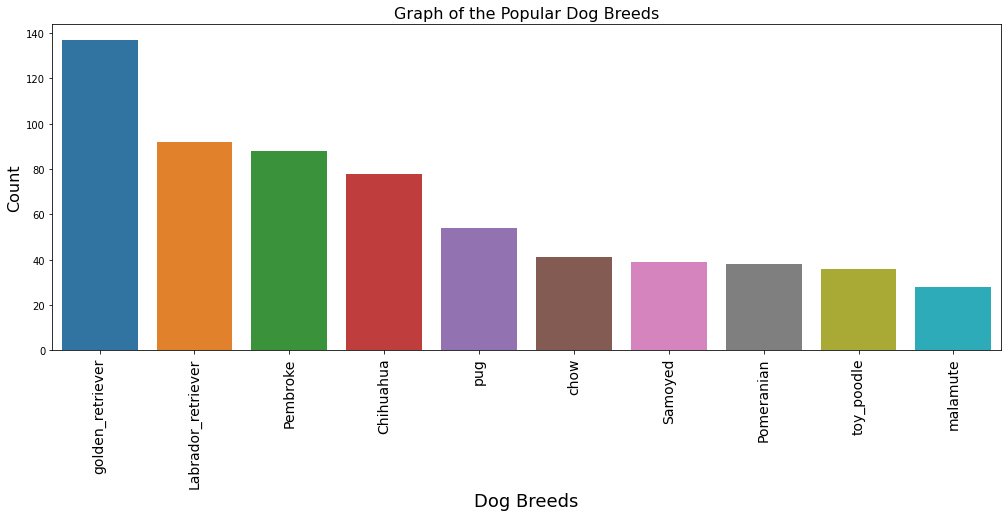

In [310]:
# print the counts of the 5 most popular Dog breeds
print(df_new['breed'].value_counts()[:5])

# set the plot size
plt.figure(figsize = (17,6))
#value_counts already in descending order of value
ax = sns.barplot(x = df_new['breed'].value_counts().index[0:10], y =df_new['breed'].value_counts().values[:10], data = df_new);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 14);
#label x axis
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Count",fontsize = 16);
# title the graph
plt.title("Graph of the Popular Dog Breeds",fontsize = 16);

As it could be seen from the analysis and the graph, the most popular Dog breed of all is the **golden_retriever** which counts 137. What does a typical golden_retriver look like? This would be answered below

In [311]:
#let's extract the image of the golden_retriever with the highest favorite
extract_gold_ret_img = df_new[df_new['breed'] == 'golden_retriever'].sort_values(by = 'favorite_count',ascending = False)
# extract just the image url (jpg_url), breed and favorite_count columns
extract_gold_ret_img = extract_gold_ret_img[['breed','favorite_count','jpg_url']][0:5]
# view
extract_gold_ret_img

,breed,favorite_count,jpg_url
92,golden_retriever,76197,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg
829,golden_retriever,51043,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg
442,golden_retriever,48559,https://pbs.twimg.com/ext_tw_video_thumb/79546...
182,golden_retriever,42569,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg
39,golden_retriever,41487,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg


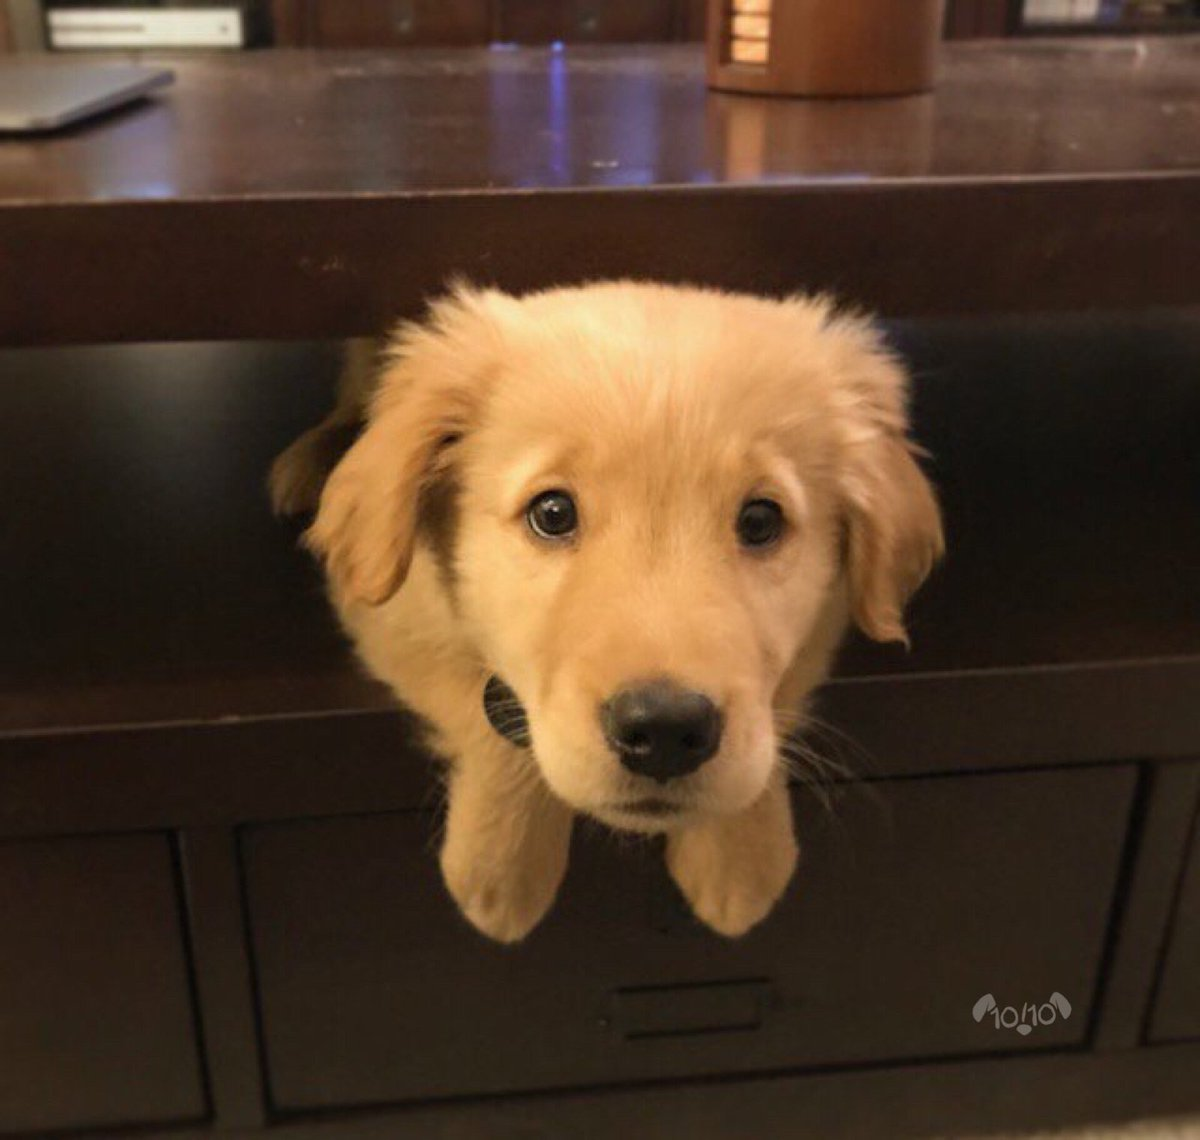

In [312]:
#get the most popular by favorite count and view
extract_gold_ret_img = extract_gold_ret_img['jpg_url'].values[0]
# trypical golden_retriever
Image(extract_gold_ret_img)

Such a very cute breed!

#### Analysis/Visualization:
Analyse and visualize the relationship between retweet counts, and favorite counts.

Text(0, 0.5, 'Retweet Count')

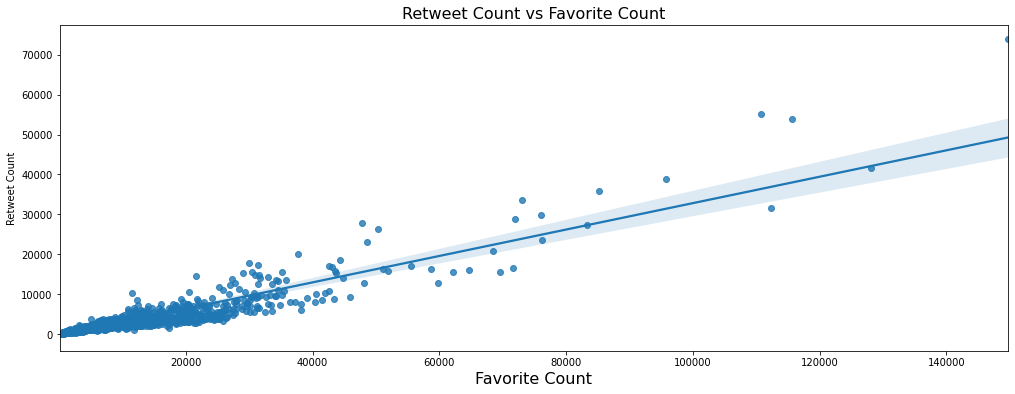

In [313]:
# set the plot size
plt.figure(figsize = (17,6))
# regression plot of retweets vs favorite count
sns.regplot(x="favorite_count", y="retweet_count", data=df_new)
# title the graph
plt.title('Retweet Count vs Favorite Count',fontsize = 16)
#label x axis
plt.xlabel('Favorite Count',fontsize = 16)
plt.ylabel('Retweet Count')

As it would be thought logical, a positive linear correlation is seen between number of retweets and the number of favorites. We could however say,a high number of retweets should be expected for a post with a high number of favorites. to further be sure about this correlation, I will find the pearson correlation between this two columns below.

In [314]:
# get pearson correlation between retwet and favorite
df_new[["favorite_count", "retweet_count"]].corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.928452
retweet_count,0.928452,1.000000


YES! The assumption made in the comment for the earlier graph prove correct. A 92% correlation is found which is a very strong positive correlation..

#### Analysis/Visualization:
Analyse and Visualize the most popular source for tweets

Twitter for iPhone    1925
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64


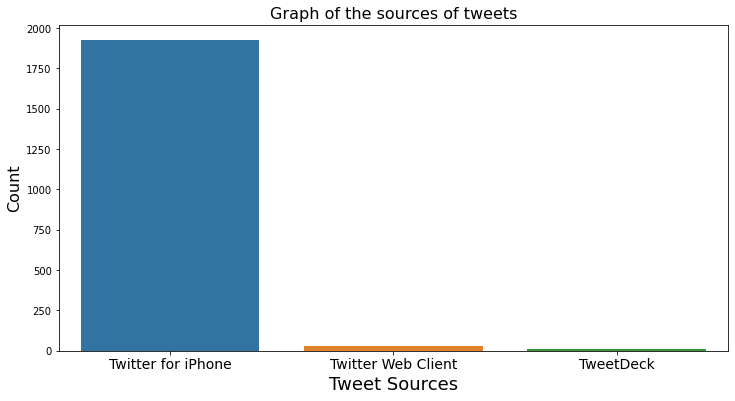

In [315]:
# print the counts of the most popular source for tweets
print(df_new['source'].value_counts())

# set the plot size
plt.figure(figsize = (12,6))
#value_counts already in descending order of value
ax = sns.barplot(x = df_new['source'].value_counts().index, y =df_new['source'].value_counts().values, data = df_new);
ax.set_xticklabels(ax.get_xticklabels(),fontsize = 14);
#label x axis
plt.xlabel("Tweet Sources",fontsize = 18);
plt.ylabel("Count",fontsize = 16);
# title the graph
plt.title("Graph of the sources of tweets",fontsize = 16);

As seen above, majorly all tweets has been made from an Iphone.

#### Analysis/Visualization:
Analyse and Visualize the most most common of all dog stages.

pupper          201
doggo            62
puppo            22
doggopupper       8
floofer           7
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64


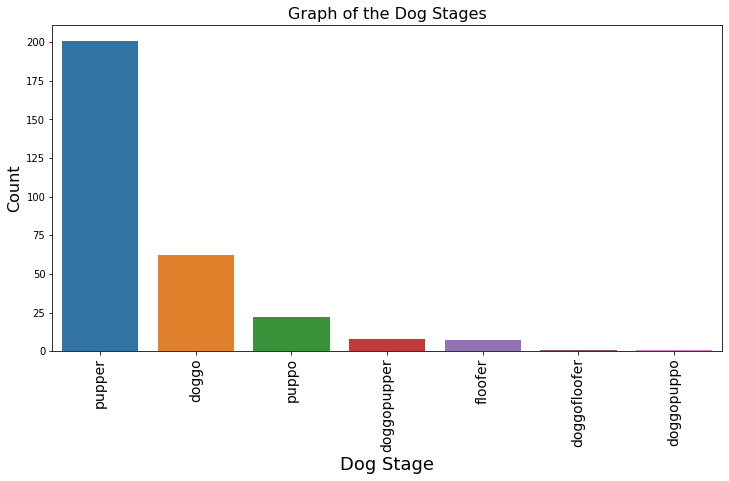

In [316]:
# print the counts of the 5 most popular Dog breeds
print(df_new['dog_stage'].value_counts())

# set the plot size
plt.figure(figsize = (12,6))
#value_counts already in descending order of value
ax = sns.barplot(x = df_new['dog_stage'].value_counts().index, y =df_new['dog_stage'].value_counts().values, data = df_new);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 14);
#label x axis
plt.xlabel("Dog Stage",fontsize = 18);
plt.ylabel("Count",fontsize = 16);
# title the graph
plt.title("Graph of the Dog Stages",fontsize = 16);

As it could be seen from the analysis and the graph, the most common Dog stage is the **pupper**  which counts 201. 

## References
- https://realpython.com/regex-python/<br>
- Alot of [Stack Overflows](https://stackoverflow.com/)<br>
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html<br>
- https://seaborn.pydata.org/tutorial/regression.html
